# Parse the location data

### This script separate the location data into the different sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math
import os
from array import *

In [2]:
data = pd.read_csv('raw_data/IMO9371361_201810_SeapathGPSGga.csv', header=0, sep=";")

In [3]:
print(list(data.columns.values))

['uid', 'time_in_ms', 'UTC', 'Latitude', 'NorthSouth', 'Longitude', 'EastWest', 'Quality', 'NoOfSatellites', 'HorPrecision', 'AntennaAltitude', 'AntennaUnits', 'GeoidalSeparation', 'GeoidalUnits', 'DgpsAge', 'DiffRefStation', 'TelegramReceived']


In [4]:
display(data[data["Longitude"].isnull()])

,uid,time_in_ms,UTC,Latitude,NorthSouth,Longitude,EastWest,Quality,NoOfSatellites,HorPrecision,AntennaAltitude,AntennaUnits,GeoidalSeparation,GeoidalUnits,DgpsAge,DiffRefStation,TelegramReceived
874397,61652778,1539226397409,25311.03,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,M,NaN,M,NaN,NaN,1
1391166,62169547,1539743167409,22600.87,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,M,NaN,M,NaN,NaN,1


In [5]:
df = pd.DataFrame(data)

In [6]:
# Filtering NaN lines
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df = df.dropna(subset=['Longitude'])
# df['Longitude'] = df['Longitude'].astype(int)

In [7]:
display(df.head())

,uid,time_in_ms,UTC,Latitude,NorthSouth,Longitude,EastWest,Quality,NoOfSatellites,HorPrecision,AntennaAltitude,AntennaUnits,GeoidalSeparation,GeoidalUnits,DgpsAge,DiffRefStation,TelegramReceived
0,60778381,1538352000409,235955.15,6326.321921,N,1024.551737,E,2,12.0,0.7,3.38,M,40.95,M,7.0,1007.0,1
1,60778382,1538352001409,235956.15,6326.321918,N,1024.551734,E,2,12.0,0.7,3.37,M,40.95,M,8.0,1007.0,1
2,60778383,1538352002409,235957.15,6326.321919,N,1024.551739,E,2,12.0,0.6,3.35,M,40.95,M,9.0,1007.0,1
3,60778384,1538352003409,235958.15,6326.321916,N,1024.551739,E,2,12.0,0.7,3.35,M,40.95,M,10.0,1007.0,1
4,60778385,1538352004408,235959.15,6326.321912,N,1024.551737,E,2,12.0,0.7,3.36,M,40.95,M,11.0,1007.0,1


In [8]:
display(len(df))

1944475

In [22]:
# Create a latitude and longitude location
loc = pd.DataFrame({
    "time_in_ms": df["time_in_ms"].values,
    "Latitude": df["Latitude"].values,
    "Longitude": df["Longitude"].values
})

In [23]:
display(loc.head())

,time_in_ms,Latitude,Longitude
0,1538352000409,6326.321921,1024.551737
1,1538352001409,6326.321918,1024.551734
2,1538352002409,6326.321919,1024.551739
3,1538352003409,6326.321916,1024.551739
4,1538352004408,6326.321912,1024.551737


In [24]:
loc.to_csv('output_data/localization.csv', sep=";")

In [25]:
# definitions for the axes
left, width = 0.1, 0.9
bottom, height =  0.1, 0.65

rect_scatter = [left, bottom, width, height]

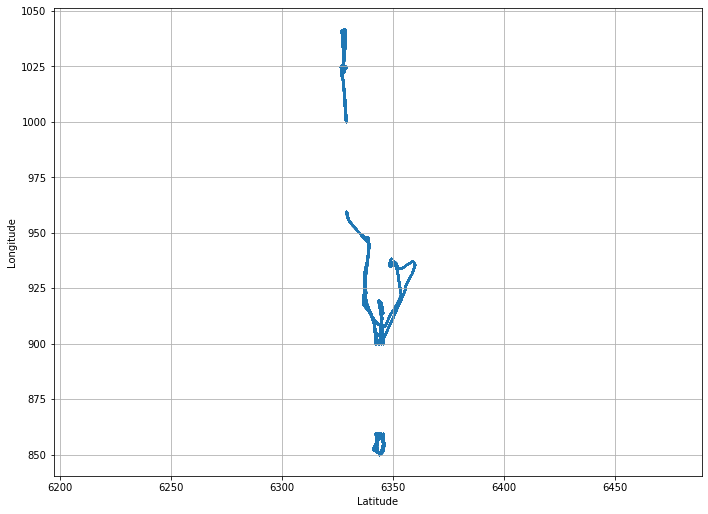

In [26]:
# start with a rectangular Figure
fig = plt.figure(1, figsize=(10,10))
axScatter = plt.axes(rect_scatter)

# the scatter plot:
axScatter.scatter(loc.Latitude.values, loc.Longitude.values, s=.1)
axScatter.grid()
axScatter.set_xlabel("Latitude")
axScatter.set_ylabel("Longitude")
axScatter.axis('equal')
plt.show()

In [27]:
# Here os taken the list of points in which the graphic seems broken and have a variation over 1%
diff_list = []

lenght = len(loc["Longitude"]) - 1

if (os.path.isfile('./output_data/diff_list.csv')):
    teste = pd.read_csv('diff_list.csv', header=None, sep=";")
    diff_list = teste.values
else:
    # Tanking the one that has at least 1% of difference
    arr = np.array([])
    for i in range(lenght):
        dist = math.fabs((loc["Longitude"][i+1] - loc["Longitude"][i])/loc["Longitude"][i])
        if (dist > 0.001):
            diff_list.append(i)   

    arr = np.append(arr, diff_list)
    np.savetxt('output_data/diff_list.csv', [arr], delimiter=';', fmt='%d')

In [28]:
display(len(diff_list[0]))

12